# SCS2013 Exercise 13

**This exercise notebook will go through the understanding of "Regular Expressions" in Python**

- Regular expressions (정규표현식)
- Metacharacters (메타문자)
- **re** module

## Regular Expressions: Syntax

Regular expressions (정규표현식) are a powerful language for matching text patterns. Let's see how regular expressions work in Python. 

Here are summary of regular expressions: metacharacters and special sequences. 


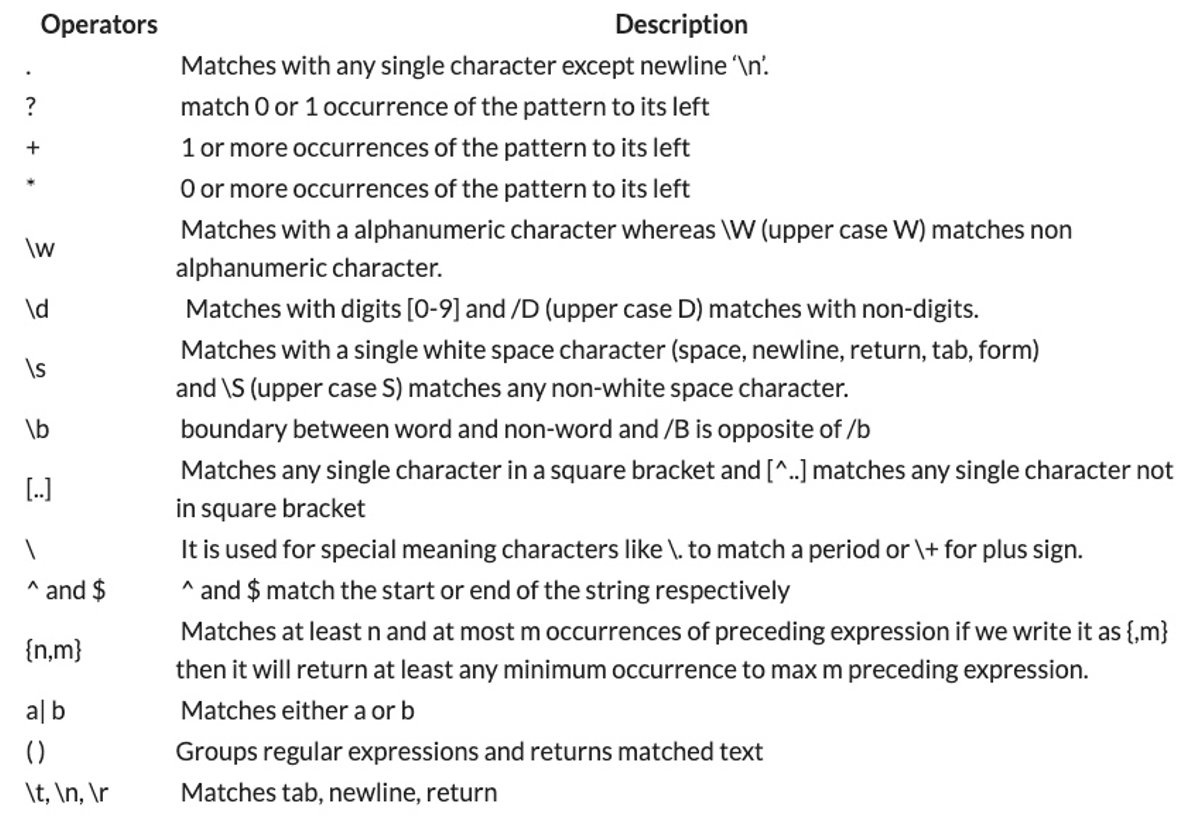

## `re` Module

The `re` module is a built-in Python module that provides all the required functionality needed for handling patterns and regular expressions 

In [ ]:
# import re module
import re

In Python, a regular expression search is typically written as:     
```
match = re.search(pattern, my_str)
```
- The `re.search()` method takes a regular expression pattern `pattern` and a string `my_str` and searches for that pattern within the string: if the search is successful, it returns a `match` object. 

**Match object**

We can use the following methods of a match object to extract the matched values and positions. 

- `group()`: return the string matched by the pattern 
- `start()`: return the start position (index) of the match
- `end()`: return the end position of the match
- `span()`: return a tuple containing the (start, end) 

In [ ]:
my_str = 'an example word:cat!'

match = re.search(r'word:\w\w\w', my_str)

if match: 
  print(f'found {match.group()}')
  print(f'match information: {match}')
  print(f'match position: {match.start()}, {match.end()} and {match.span()}')
else:
  print(f'not found')

**`re` Methods**

Here are the list of regex methods and their functionality. 

* **`pat = re.compile(str_pattern)`**: compile a regex pattern provided as a string into a `re.Pattern` object `pat`

  - write regex pattern in string format: use a **raw string** format - escape (`\` 등) 에 영향을 받지 않고 그대로 표시 
```
str1 = 'test \n\\!!'
str2 = r'test \n\\!!'
```

- use `re.Pattern` object to match a regex pattern

  - `pat.findall(my_str)` or `re.findall(pattern, my_str)`

* **`re.match(pattern, my_str)`**: search for the occurrence of the regex pattern `pattern` only *at the beginning* of the target string `my_str` and return the match 

* **`re.search(pattern, my_str)`**: search for occurrences of the regex pattern `pattern` inside the target string `my_str` and return only the *first* match 

* **`re.findall(pattern, my_str)`**: find all matches to the regular expression pattern `pattern` through the entire target string `my_str` and returns all the matches in the form of list

* **`re.finditer(pattern, my_str)`**: return an *iterator* over all matches in the string. For each match of the iterator, it returns a Match object


In [ ]:
# what is a raw string? 

str1 = 'test \n\\!!'
str2 = r'test \n\\!!'

print(str1)  
print(str2)

In [ ]:
# make a pattern and use it to match a regex pattern
# how to find a match of any five-letter word? 

pat = re.compile(r'\b\w{5}\b')

result = pat.match('Hello everyone')
print('1:', result)

result2 = pat.findall('Hello 1234 and 567 and 89')
print('2:', result2)

# how to find a match of any three consecutive digits? 

pat2 = r'\d{3}'

result3 = re.findall(pat2, 'Hello 1234 and 567 and 89')
print('3:', result3)

Or equivalently, we can use a string pattern directly 

In [ ]:
pattern = r'\b\w{5}\b'
result = re.match(pattern, 'Hello everyone')
print(result)

How `.match()`, `.search()`, `.findall()`, `.finditer()` work?

In [ ]:
# re.match(): search any five-letter word at the beginning

result = re.match(r'\b\w{5}\b', 'Hello John and Kelly')
print(result)
print(result.group())

In [ ]:
# re.search(): search any five-letter word (first occurrence)

result = re.search(r'\b\w{5}\b', 'Hello John and Kelly')
print(result)
print(result.group())

In [ ]:
# re.findall(): how to find all numbers present inside the target string? 
pattern2 = r'\d+'
target_str = 'Emma is a basketball player who was born on June 17, 1993. She played 112 matches with scoring average 26.12 points per game.'

result2 = re.findall(pattern2, target_str)
print(result2)

In [ ]:
# re.finditer(): get an iterator of matches of any five-letter word

result = re.finditer(r'\b\w{5}\b', 'Hello John and Kelly')
print(result)

for match in result:
  print(match.group())

In [ ]:
# find all words starting with a specific letter 'P' or 'd'

target_str = 'James is a Python developer. He took a class of Python Programming'
pattern = r'\b[Pd]\w+\b'
result = re.findall(pattern, target_str)
print(result)

**group ()**

We create a group by using () to match several distinct patterns inside the same target string as a single unit

In [ ]:
target_str = 'The price of PINEAPPLE ice cream is 2000'

# first group pattern: match an uppercase word [A-Z]+ 
# second group pattern: match a number \d+

pattern = r'(\b[A-Z]+\b).+(\b\d+\b)'
result = re.search(pattern, target_str)
print(result.groups())
print(result.group(1))
print(result.group(2))

In [ ]:
target_str = 'Kim:25-Male Lee:23-Female Part:28-Male'
pattern = r'[-](\w+)'
result = re.findall(pattern, target_str)
print(result)

How `.split()`, `.sub()` work?

* **`re.split(pattern, my_str)`**: split the string `my_str` by the occurrences of the regex pattern `pattern`and return a list of the resulting (splitted) substrings

* **`re.sub(pattern, replacement, my_str)`**: replace one or more occurrences of a regex pattern `pattern` in the target string `my_str` with a substitute string `replacement`

In [ ]:
# split by one or more whitespace characters

target_str = 'My   name is James\n and my luck numbers\t are 12   45  78'
words = re.split(r'\s+', target_str)
print(words) 

In [ ]:
# split by the comma , or the hyphen -

target_str = '12,45,78,85-17-89'
result = re.split(r'-|,', target_str)
print(result)

In [ ]:
# replace all whitespace with a hyphen 

target_str = 'James knows Python and machine learning'

pattern = r'\s'
new_pattern = '-'

new_str = re.sub(pattern, new_pattern, target_str)
print(target_str)
print(new_str)

In [ ]:
# remove leading and trailing spaces (앞 뒤 공백)

target_str = '   James knows Python and machine learning  \n'

# leading spaces: ^\s+
# trailing spaces: \s+$
pattern = r'^\s+|\s+$'
new_pattern = ''

new_str = re.sub(pattern, new_pattern, target_str)
print(target_str)
print(new_str)

In [ ]:
# replace multiple patterns: replace whitespace and hyphen(-) with a comma (,)

target_str = 'James-25\tKim-32 Lee-28\n Alice-22'
pattern = r'(\s+)|(-)'
new_pattern = ','

new_str = re.sub(pattern, new_pattern, target_str)
print(target_str)
print(new_str)

new_list = re.split(',', new_str)
print(new_list)

In [ ]:
# Finally: masking social number information

data = """Park 800905-1234567
Kim  700905-2345678
Lee  910515-2155555"""

pattern = r'[-](\d{7})'
new_pattern = r'-*******'

new_data = re.sub(pattern, new_pattern, data)

print(data) 
print('=====')
print(new_data)

In [ ]:
# Finally: checking the target string is a word with at least 8 letters
target_str = input('Enter your word: ')

pattern = r'\w{8,}'
result = re.fullmatch(pattern, target_str)

if result:
  print(f'It has at least 8 letters: {result.group()}')
else:
  print(f'Invalid word')

## Exercises for RegEx

### E-1: 

Search any eight-letter word and print out its information such as matching string, span, and so on.

In [ ]:
target_str = 'Emma is a baseball player who was born on June 17'

# your code here:


# print the match object:




### E-2:      

Find all substrings that starts with an uppercase

Result:
```
['EMMA', 'June', 'Python', 'Programming']
```

In [ ]:
target_str = 'EMMA is a baseball player who was born on June 17 and takes a class Python Programming'

# your code here:




### E-3:

Find all words starting with a letter 'P' and ending with a letter 'g'

Result:
```
['Programming', 'Pug']
```

In [ ]:
target_str = 'James is a Python developer. He took a class of Python Programming. He lives with a Pug.'

# your code here:




### E-4: 

Find all words starting or ending with a letter 'a'

Result:
```
['banana', 'and', 'apple']
```

In [ ]:
target_str = 'Kelly loves banana and apple'

# your code here:




### E-5:     

Split the target string with characters: colon(:), comma(,) and whitespaces

Result:
```
['Korea', 'co.kr', 'USA', 'com', 'UK', 'co.uk']
```

In [ ]:
target_str = 'Korea: co.kr, USA: com, UK: co.uk'

# your code here:




### E-6:

Remove the parenthesis (괄호: ()) area in each string of the list `items` and create a list with them. 

Result:
```
['email ', 'Python', 'DGU ', 'Regular  expressions!']
```

In [ ]:
items = ['email (gmail.com)', 'Python', 'DGU (dgu.ac.kr)', 'Regular (re) expressions!']

# your code here:



